<a href="https://colab.research.google.com/github/TheAmirHK/BATTwin_Publications/blob/main/Data_Paper/DataGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skopt.sampler import Hammersly
from skopt.sampler import Lhs
from skopt.sampler import Halton
from skopt.space import Space

In [ ]:
# In[Generate DOE]

def design_of_experience (population_size , sampling_model):

    ## Initialization
    pop_s = population_size

# headers = ['Anode reusing rate', 'Anode wasting rate', 'Cathode reusing rate', 'Cathode wasting rate', 'Cell rejection rate', 'Cell repairing rate', 'Cell scrap rate']
    Probabilities = [(0,100)            ,(0,30),                (0,100),                (0,30),                 (0,30),             (0,100),                (0,100)]

    search_space = Probabilities
    search_space = Space(search_space)

    ## Sampling methods
    if sampling_model == 'random':
        random_data = search_space.rvs(pop_s)

    if sampling_model == 'LHS':

        lhs = Lhs(lhs_type="centered", criterion="maximin", iterations=1000)
        random_data = lhs.generate(search_space.dimensions, pop_s )

    if sampling_model == 'hammersly':
        hammersly = Hammersly()
        random_data = hammersly.generate(search_space.dimensions, pop_s,random_state=32)

    if sampling_model == 'halton':
        hal = Halton()
        random_data = hal.generate(search_space.dimensions, pop_s)

    random_data = np.asarray(random_data)

    return random_data

number_of_iterations = int(10_000)
data = design_of_experience (number_of_iterations,'hammersly')

In [ ]:
# In[Save the dataset]

headers = [
    'Anode reusing rate',
    'Anode wasting rate',
    'Cathode reusing rate',
    'Cathode wasting rate',
    'Cell rejection rate',
    'Cell repairing rate',
    'Cell scrap rate'
]

df = pd.DataFrame(data, columns=headers)

output_filename = rf"DOE__{number_of_iterations}.xlsx"
df.to_excel(output_filename, index=False)
print(f"Data saved successfully ...")

Data saved successfully ...


In [ ]:
# In[Data description]

df.describe()

,Anode reusing rate,Anode wasting rate,Cathode reusing rate,Cathode wasting rate,Cell rejection rate,Cell repairing rate,Cell scrap rate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.983000,14.991500,49.987500,14.990500,14.986200,49.946800,49.996400
std,28.871787,8.671248,28.871971,8.671224,8.671132,28.875203,28.871913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,7.000000,25.000000,7.000000,7.000000,25.000000,25.000000
50%,50.000000,15.000000,50.000000,15.000000,15.000000,50.000000,50.000000
75%,75.000000,22.000000,75.000000,22.000000,22.000000,75.000000,75.000000
max,100.000000,30.000000,100.000000,30.000000,30.000000,100.000000,100.000000


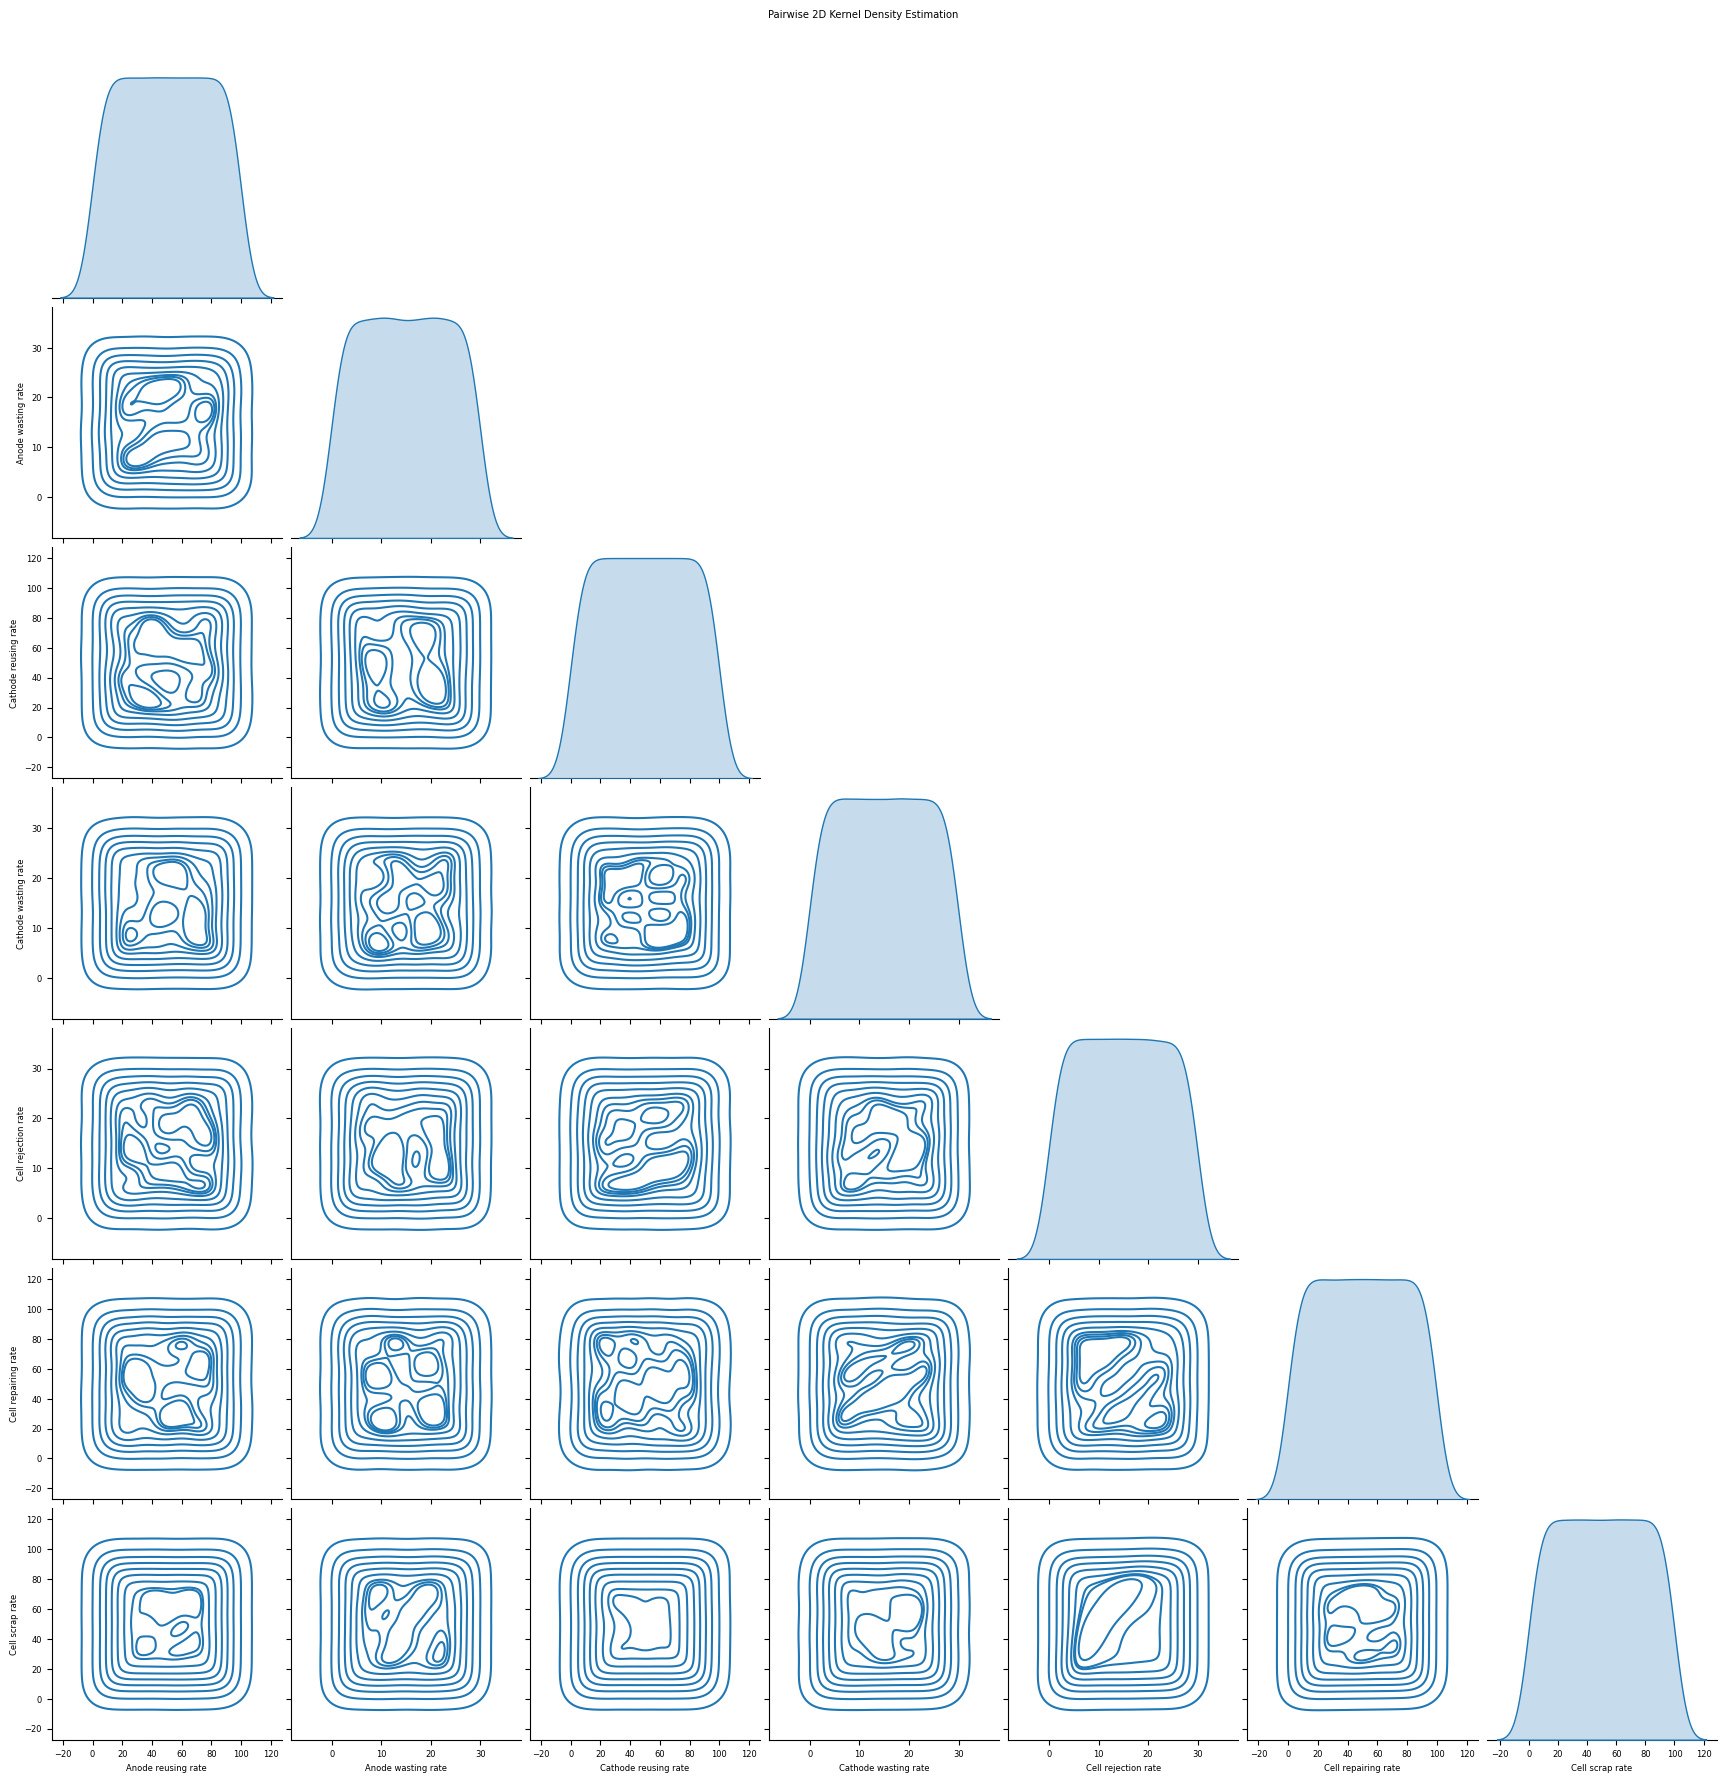

In [ ]:
# In[Density of the generated data]

plot = True

if plot == True:
    plt.rcParams.update({'font.size': 6})
    cols = [h for h in headers]
    df = pd.DataFrame(data, columns=cols)
    sns.pairplot(df, kind="kde",diag_kind="kde", corner=True)
    plt.suptitle("Pairwise 2D Kernel Density Estimation", y=1.02)
    plt.show()



Generating plots for sampling model: random


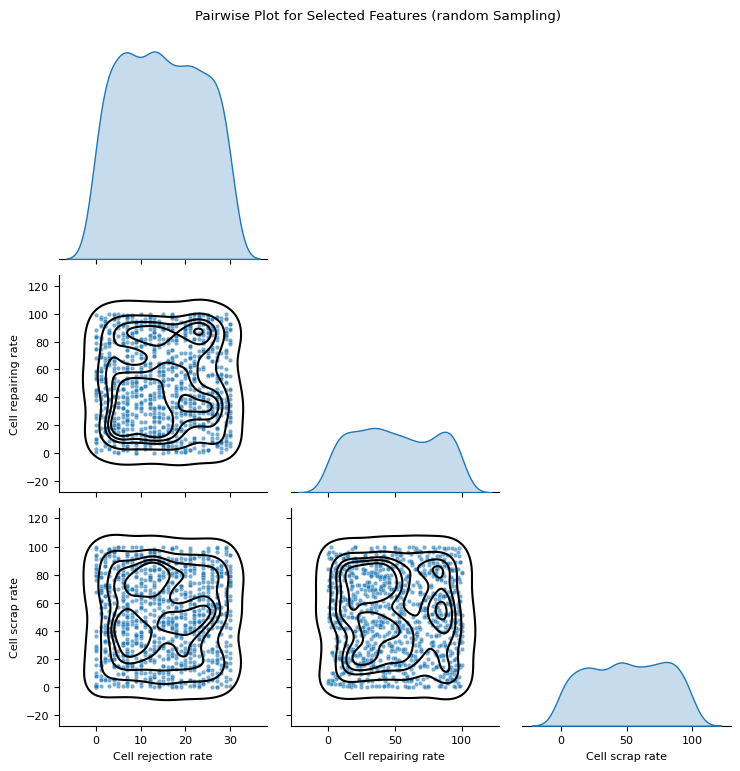


Generating plots for sampling model: LHS


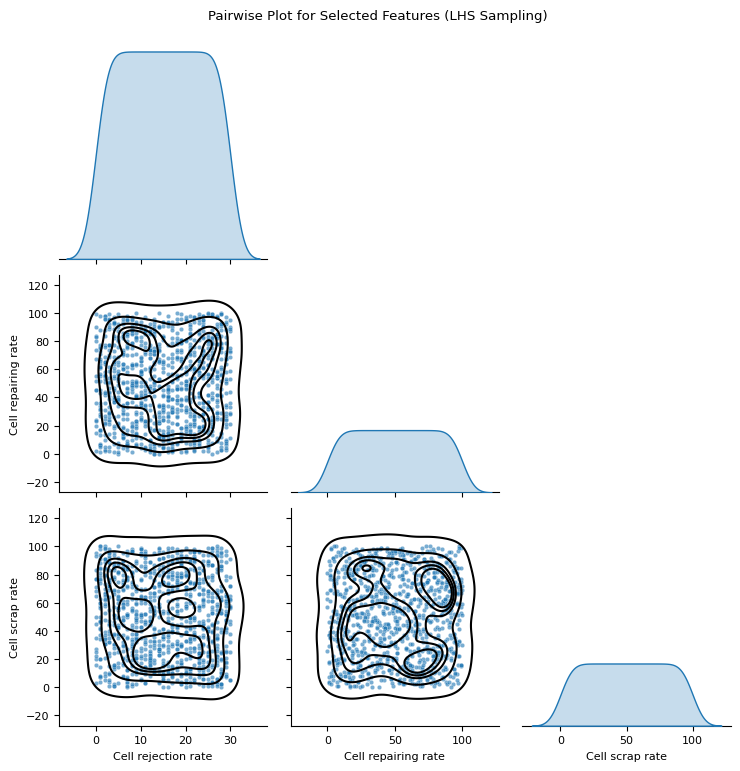


Generating plots for sampling model: hammersly


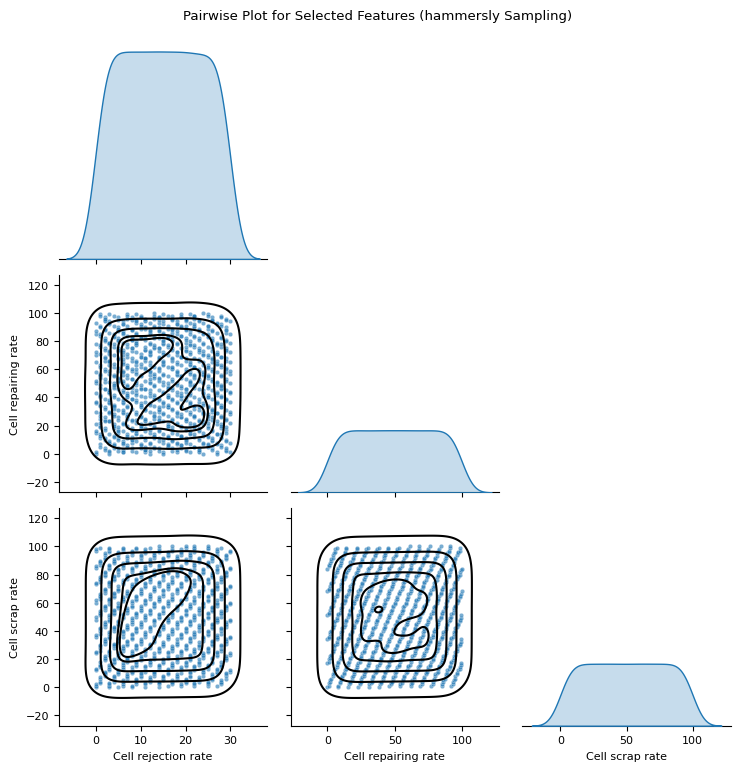


Generating plots for sampling model: halton


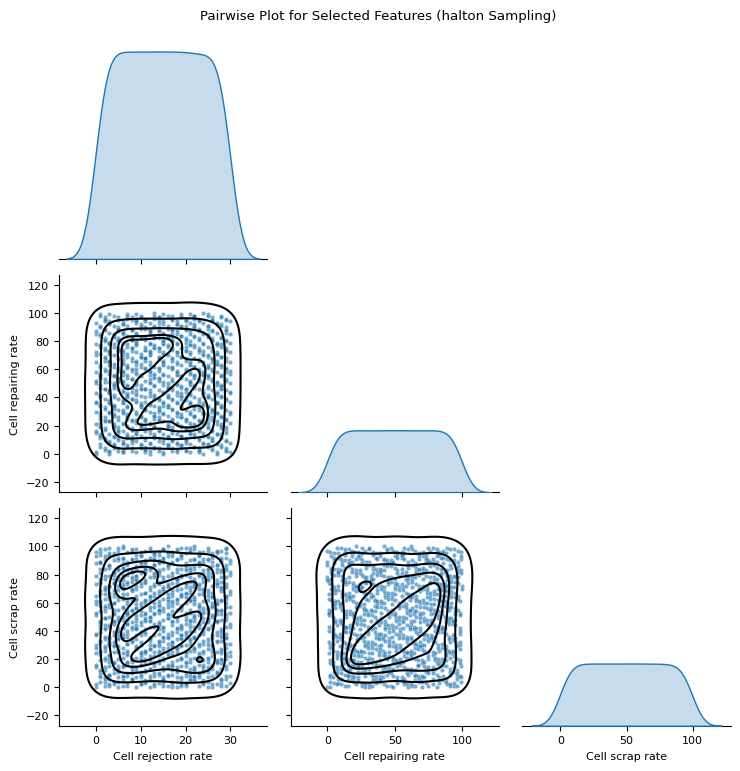

In [ ]:
# In[Plotting all the models]
sampling_models = ['random', 'LHS', 'hammersly', 'halton']
selected_features = ['Cell rejection rate', 'Cell repairing rate', 'Cell scrap rate']
plt.rcParams.update({'font.size': 8})

for model_name in sampling_models:
    print(f"\nGenerating plots for sampling model: {model_name}")

    # generate data using the current sampling model
    data = design_of_experience(number_of_iterations, model_name)
    df = pd.DataFrame(data, columns=headers)
    df_selected = df[selected_features]
    grid = sns.PairGrid(df_selected, corner=True)
    grid.map_diag(sns.kdeplot, fill=True)
    grid.map_lower(sns.scatterplot, s=10, alpha=0.6)
    grid.map_lower(sns.kdeplot, levels=6, color='black', linewidths=1.5)
    grid.fig.suptitle(f"Pairwise Plot for Selected Features ({model_name} Sampling)", y=1.02)
    plt.show()
